# 作業一


In [2]:
# import 是 Python 載入套件的基本語法 (類似 C 語言的 include), 後面接要載入的套件
# import AAAAA as BB, 其中 BB 是代稱, 表示除了載入 AAAAA 之外, 之後都可以用 BB 代替 AAAAA 這個名稱
# 常用套件往往有其對應代稱, numpy的代稱是np, pandas的代稱是pd, matplotlib.pyplot的代稱是plt
# numpy 常用於數值/陣列運算, pandas 擅長資料格式的調整, matplotlib 擅長繪圖
import numpy as np
import matplotlib.pyplot as plt

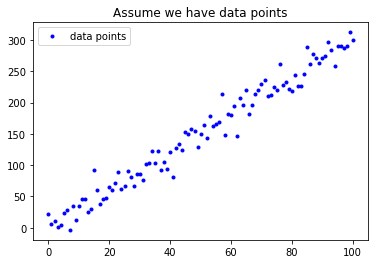

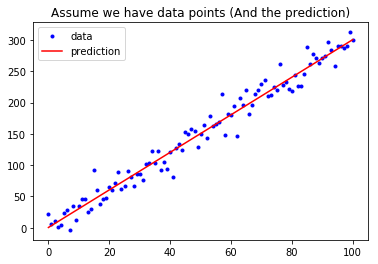

In [3]:
# Python 的變數不須宣告, 可能是文字, 數值, 陣列, 甚至是物件, 對初學者來說這往往是最難接受的地方
# 主要是 Python 在大多數情況下, 可以由運算"猜"出你想要的型態, 我們由下列語法看看發生了什麼事吧
# w, b 是數值
w = 3
b = 0.5

# np.linspace 是 numpy.linspace 的意思
# np.linspace(0, 100, 101)是指 0~100 劃分成 101 個刻度(含頭尾), 所也就是 0, 1, 2,...,100 這 101 個數
# 這時候, x_lin 因為要記錄不只一個數, 因為 np.linspace() 傳回的是一個 Array, 所以 x_lin 就變成 Array 了
x_lin = np.linspace(0, 100, 101)

# np.random.randn() 就是 numpy.random.randn(), 會隨機傳回標準常態分布的取樣值
# np.random.randn(101) 表示取樣了101次, 型態是 Array, 所以其他 + 與 * 的部分都是 Array 的加與乘, 一行就計算了101筆資料
# 所以最後的結果 y, 也是一個長度 101 的 Array
y = (x_lin + np.random.randn(101) * 5) * w + b

# 這邊就是將 x_lin 以及剛剛算完的 y, 當作座標值, 將101個點在平面上畫出來
# b. : b 就是 blue, 點(.) 就是最小單位的形狀, 詳細可以查 matplotlib 的官方說明
plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()


# 這邊的 y_hat, 就沒有隨機的部分了, 也就是下圖中的紅色實線部分
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
# 上面的 'b.' 是藍色點狀, 下面的 'r-' 是紅色線狀, label 是圖示上的名稱
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [4]:
# Python 的函數是另一個新手上手的困難點, 由def開頭, 依序是函數名稱 / 輸入值, 冒號(:)結尾
# 最難讓人習慣的是 Python 的函式與條件判斷, 前後都沒有大括弧(其他程式常見), 而是以四格空白縮排來取代
# 以本例來說, mean_absolute_error 這個函數的定義範圍到 return mae 為止, 因為中間都是縮排, 而 """ 是多行註解(井號是單行註解)
# 函數中, sum(), abs(), len() 都是 Python 原有的方法, 因此可以直接呼叫
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    # 主要是下面這一行
    mse = sum((y - yp)**2) / len(y)
    return mse

# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MAE

# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 239.760
The Mean absolute error is 11.753


In [5]:
# Mean Squared Error (MSE)
# $ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $
def mse(x, y):
    error = 0.0
    for i in range(len(x)):
        error += (y[i] - x[i]) ** 2
    return error / len(x)
    
x = [1.2, 3.2, 4.8]
y = [-19.8, -18.2, -10.11]

print(mse(x, y))

373.75603333333333



# 作業二

我選的資料是 "NFL Punt Analytics Competition"
url
https://www.kaggle.com/c/NFL-Punt-Analytics-Competition
1. 你選的這組資料為何重要
   在大數據時代，「Money Ball」這部電影啟發了我對數據有了不一樣的看法，從資料中透過清理及分析後，將這些資料轉換為有用的資訊，
   更讓這些資料產生了價值。在電影中，必須先了解什麼是棒球，需要萃取什麼特色資料，進而降低成本作為調整營運球隊的重要關鍵。
   NFL 美國超級盃，在美洲也是相當盛行的一個運動競技項目 ，此競賽提供2016-2017賽事所有相關的資料，其中也有很多該領域才有的特色屬性
   較不同的是，這是一個研究超級盃的那些關鍵因素能減少腦震盪。在高張力的美式足球運動中，不行的碰撞是難免的，透過分析來預測或預防可能發生的    潛在危險
   
  
2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
    文中提到"This challenge is part of NFL 1st & Future, presented by Arrow Electronics – the NFL’s annual Super Bowl 
    competition designed to spur innovation in player health, safety and performance."
    從而得知，這資料是由Arrow Electronics  提供 ，目的在提刺激運動員健康，安全和性能方面的創新。

3. 蒐集而來的資料型態為何
    資料主要可以分為以下幾大項
    Game data:與賽事相關項目的資料，包含主客場、時間、氣溫等
    Play Information: 比賽內容跟細節，像是 分數
    Player Punt Data:球員的特徵像是球衣背號、位置
    Play Player Role Data:這些球員彼此之間的差異，建立了此表來定義了每場比賽中的所有玩家
    Video Review:這主要就是像文字播報一樣，將視覺比賽的東西透過文字呈現記錄下來
    NGS (Next Gen Stats):NGS是在這較為特殊的資料，數據集包含整個比賽過程中每個球員的球員位置和方向數據。 NGS數據集是唯一包含Time作為變     量的數據集。可以根據提供的時間以及球員移動的的X，Y位置坐標來計算速度。

4. 這組資料想解決的問題如何評估
   首先針對資料清理是一個非常大的關鍵，雖然資料集提供單位已經協助整理過，但還是必須針對重要資料再作整理。舉例而言可以嘗試制定獨特的規則，    以提高球員的安全性，但從原則和策略上講，這可能會減少比賽的張力，因此，減少腦震蕩的最有效規則是限制收益的簡單易行的規則。
   使比賽存在著一個觀眾也能接受，且又能保障球員安全的情況

# 作業三

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
   自由載客最重要的就是要先了解人、時、地，什麼時間點在什麼地方會有最多客源，再者就是時事影響，如何增加自由載客的安全性，以及像是
   在流行病毒感染下，如何增加顧客的信任度，才是提升業績的重要性。
   首先我會先分析目前顧客喜歡群聚的地點以及時間點，再藉由季節性活動理解哪裡有需要載客的需求，最後就是安全性與客製化，像是針對機場接送，能
   提供休旅車載送量較大等

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
    政府相關單位提供的資料，像是開放資料opensource能夠提供相關活動訊息，觀光局透過這些活動訊息可以理解哪裡是需要接送的，以及交通部
    有提供相關的api對於交通安全的一些公告
   
3. 蒐集而來的資料型態為何
    通常會以json型式，包含 時間、地點、流量等相關資訊

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)
   透過一些特徵資料，像是哪類的活動能夠提升最大的顧客載量，而在下一次遇到同類型活動時，能夠藉由所建立的模型
   預測該派多少輛車出去載客，能達到最大的效益。
